In [21]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
f = open("output", "r")

total_count = 0
time_series = []
droped = []
#read all the line in the f
lines = f.readline()

while lines:
    lines = f.readline()

    if "Received" in lines:
        total_count += 1
        time_series.extend([0]*1000)

    if "Packet dropped between" in lines:
        packetDroped = int(lines.split(" ")[-1]) -  int(lines.split(" ")[-3]) -1

        time_series.extend([1]*packetDroped)
        droped.append(packetDroped)
f.close()

droped = np.array(droped)
droped = droped[droped < 100]

print(f"Total packets received: { total_count*1000:,}")
print("Total packets dropped: ", np.sum(droped))



Total packets received: 786,000
Total packets dropped:  5510


In [22]:
df = pd.DataFrame(droped, columns=['droped'])
number_counts = df['droped'].value_counts().sort_index()
number_counts = number_counts/total_count/1000    

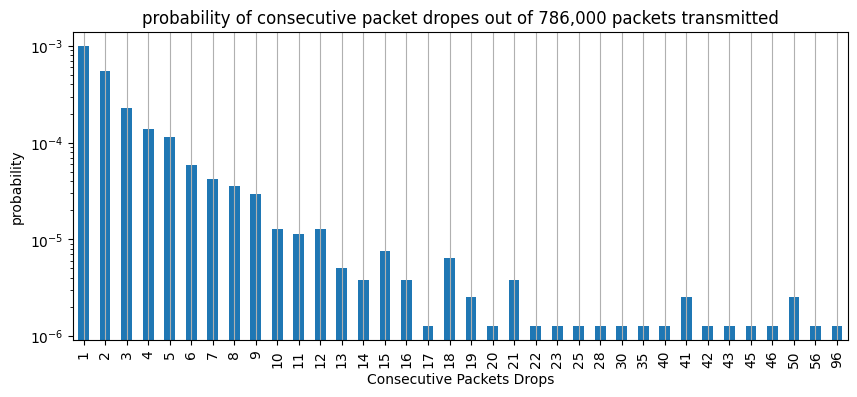

In [23]:


plt.figure(figsize=(10, 4))
number_counts.plot(kind='bar')
plt.title(f'probability of consecutive packet dropes out of {total_count*1000:,} packets transmitted')
plt.xlabel('Consecutive Packets Drops')
plt.ylabel('probability')
plt.yscale('log')
plt.grid(axis='x')
plt.show()

Text(0.5, 1.0, 'Packet droped vs time')

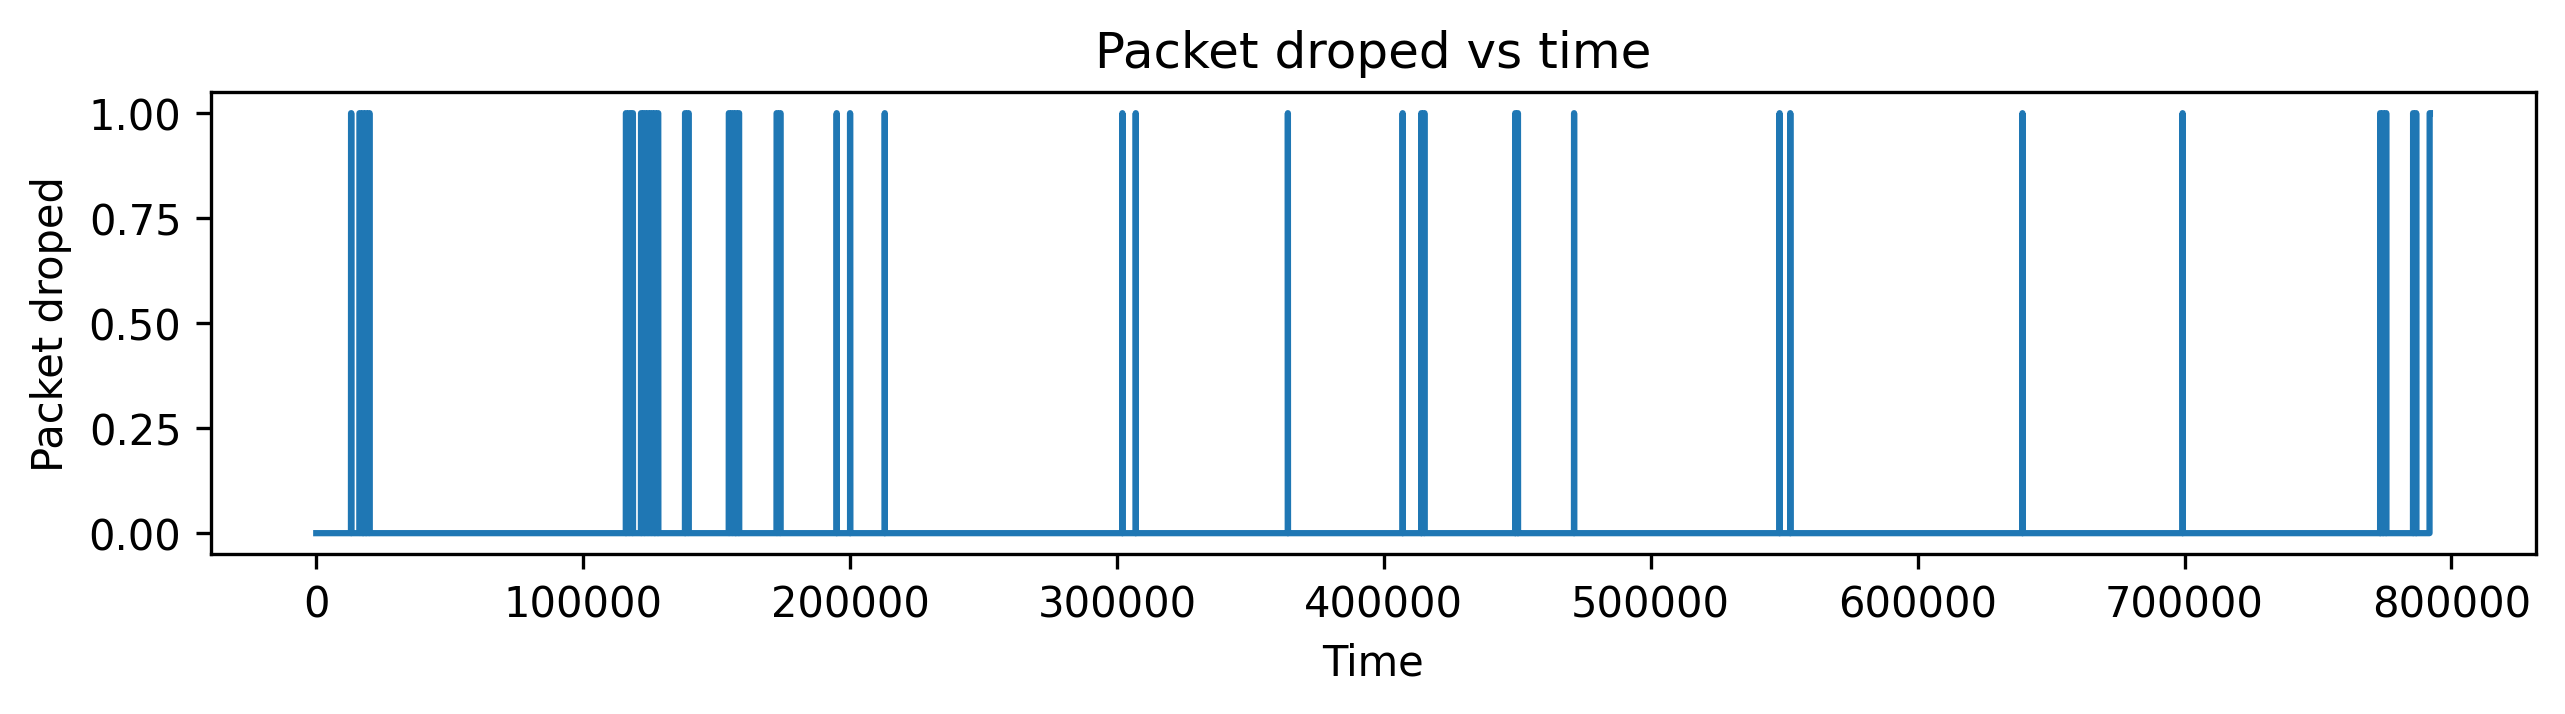

In [31]:
plt.figure(figsize=(10, 2),dpi=300)
plt.plot(time_series)
plt.xlabel('Time')
plt.ylabel('Packet droped')
plt.title('Packet droped vs time')

